In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import func
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#from sklearn.model_selection import cross_val_score
pd.set_option("display.max_rows", 100, "display.max_columns", 100) 

In [4]:
df = pd.read_excel('cec_clay_susc.xlsx')

df.describe()

,NUMBER,Duration,Depth,Kre_F1,Kim_F1,Ph_F1,Mass,#_y,Rg_F3,Kre_F3,Kim_F3,Ph_F3,F1mass,F3mass,kfd_abs,kfd,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,Hg,Hg Error,Zn,Zn Error,W,W Error,Cu,Cu Error,...,Cd,Cd Error,Ag,Ag Error,Pd,Pd Error,Bal,Bal Error,Nb,Nb Error,Bi,Bi Error,Re,Re Error,Ta,Ta Error,Hf,Hf Error,Al,Al Error,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO
count,56.000000,56.000000,56.000000,69.000000,56.000000,56.000000,69.000000,56.000000,56.000000,69.000000,5.600000e+01,56.000000,69.000000,69.000000,69.000000,69.000000,5.600000e+01,56.0,56.000000,56.0,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.0,56.0,56.0,56.0,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,65.000000
mean,128.500000,361.190357,84.607143,0.005617,0.000008,1.780714,14.700870,443.767857,3.035714,0.005225,5.588430e-07,1.749464,3929.120643,3650.592227,278.528416,10.520725,8.147736e+05,0.0,3376.150357,0.0,104966.773571,0.0,5.670000,1.382143,336.833571,2.826607,87.617857,1.50750,0.0,2.999107,52.193750,1.420357,4.658571,1.296607,14.559643,2.105179,0.0,3.128036,0.0,1.689643,7.546607,2.072143,0.079464,4.018214,34.129643,3.471429,0.0,16.186429,9.710179,6.104286,...,0.523750,6.281964,0.738214,3.623214,0.646429,5.319286,506493.865714,1098.384464,7.329107,1.080357,3.212679,1.823750,0.0,1.5,0.0,1.5,0.0,1.5,55537.975536,1153.834286,230.206786,217.406964,380735.293571,1048.967857,5.42250,18.371250,1782.683929,1327.247143,6.855536,14.501250,0.796964,8.866429,0.0,19.163750,21.017857,1.562768,84.357143,8.495217,1.675855,7.394493,10.842652,15.952587,11.581246,18.975463,30.556709,35.127677,18.363028,53.490705,0.953236,6.087692
std,129.429517,0.740427,60.721923,0.012514,0.000008,6.280166,1.670142,205.886022,0.187256,0.011636,1.932940e-06,3.690164,8951.391621,8309.820935,645.720143,20.799973,1.395492e+05,0.0,2442.210344,0.0,37035.560062,0.0,2.773215,0.127089,155.551836,0.701866,55.872667,0.49634,0.0,0.540708,24.564462,0.355374,2.843824,0.144829,9.187658,0.338639,0.0,0.227104,0.0,0.131508,6.452734,0.359043,0.594656,0.350335,36.843258,0.763653,0.0,1.292301,9.846063,0.949706,...,1.950608,0.884304,1.539733,0.982307,1.894977,1.595178,27814.679966,74.493896,4.388561,0.185295,3.179280,0.326438,0.0,0.0,0.0,0.0,0.0,0.0,19595.534544,241.890321,468.180725,309.021511,65209.886639,56.098186,31.26507,2.523047,1683.146872,509.753206,14.302167,10.719625,3.467316,0.881541,0.0,1.076521,18.076093,0.164355,60.796659,9.510156,1.905584,1.073930,9.093561,11.803780,8.930848,16.202309,23.320465,19.785063,22.984153,31.336711,1.097051,12.087746
min,1.000000,360.010000,4.000000,0.000003,-0.000002,-37.920000,10.680000,65.000000,3.000000,0.000001,-6.072000e-06,-0.790000,0.160813,0.080649,0.011962,2.977099,4.877352e+05,0.0,0.000000,0.0,30473.500000,0.0,0.000000,1.090000,43.120000,1.190000,11.110000,0.69000,0.0,1.940000,9.580000,0.740000,0.000000,0.940000,2.330000,1.530000,0.0,2.740000,0.0,1.450000,0.000000,1.450000,0.000000,2.760000,0.000000,2.480000,0.0,14.000000,0.000000,4.930000,...,0.000000,3.250000,0.000000,1.740000,0.000000,1.800000,465954.720000,904.680000,0.000000,1.000000,0.000000,1.500000,0.0,1.5,0.

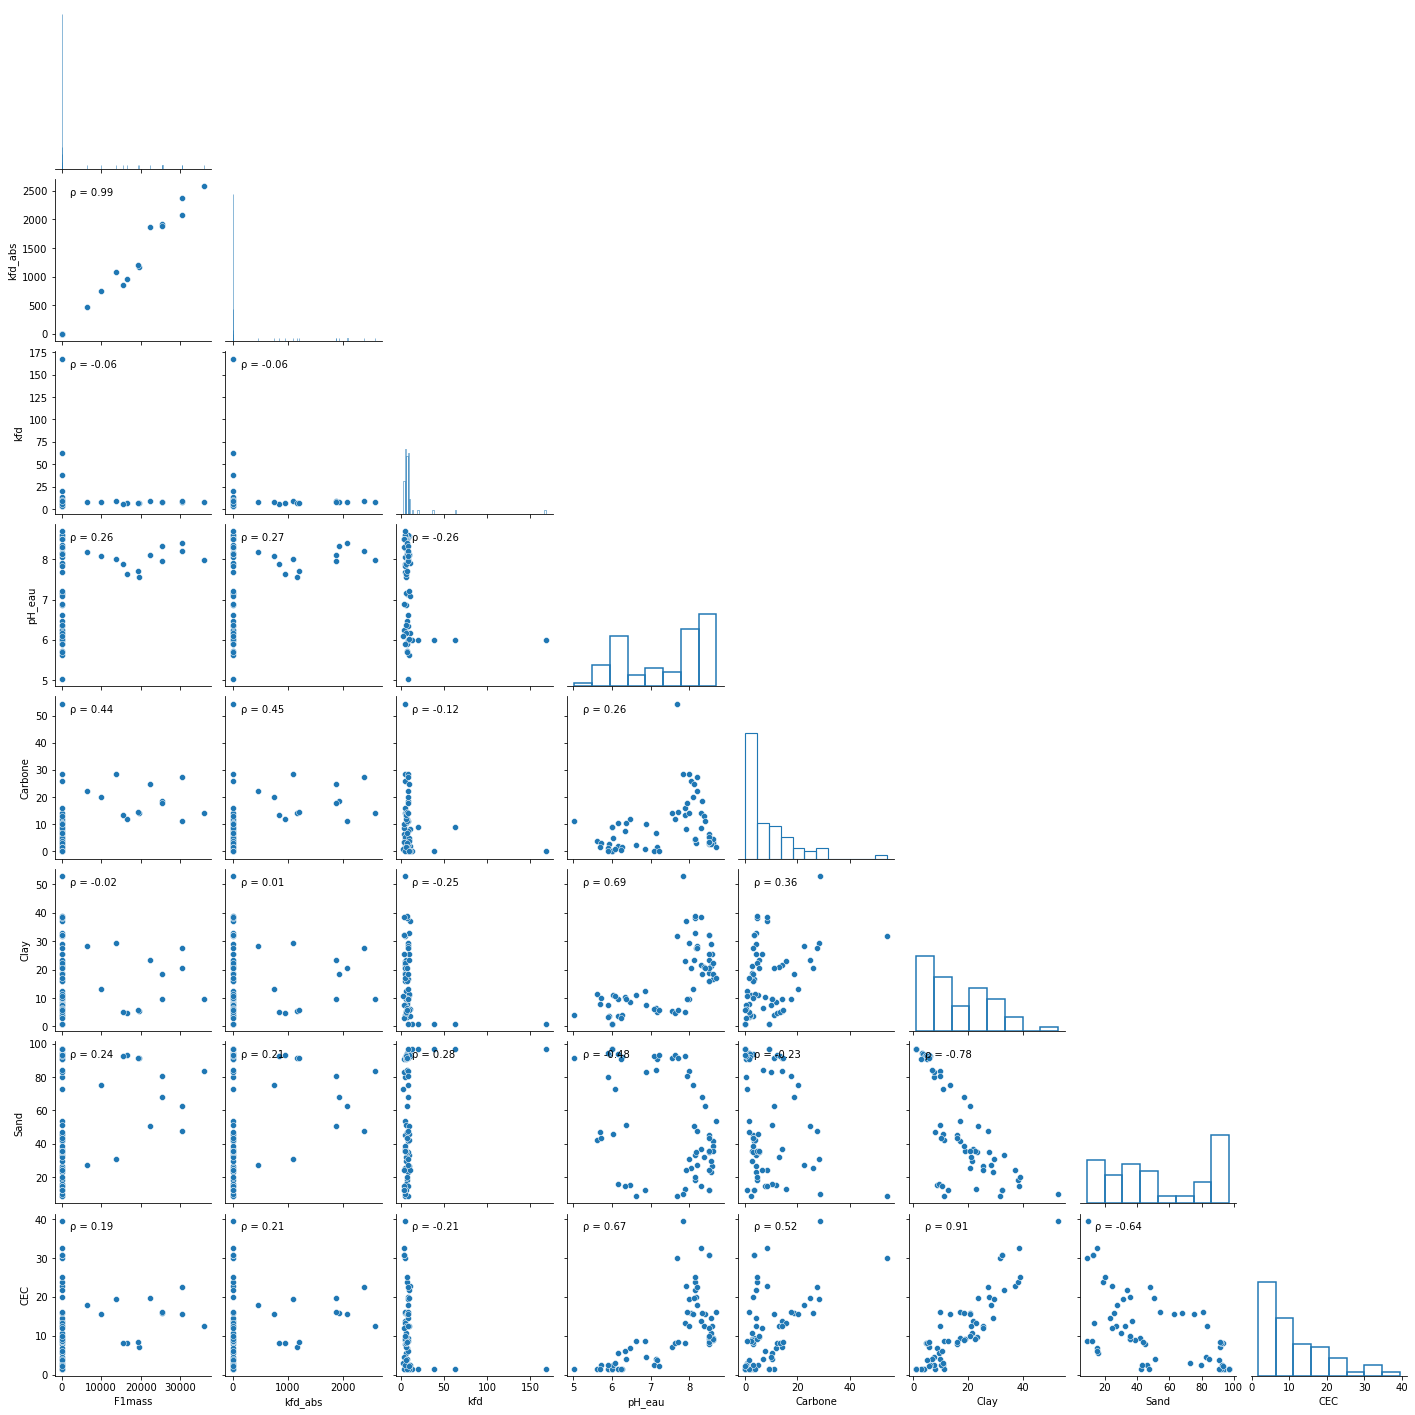

In [5]:
g = sns.pairplot(df.loc[:,['F1mass', 'kfd_abs', 'kfd', 'pH_eau', 'Carbone', 'Clay', 'Sand', 'CEC']], 
                  diag_kws=dict(fill=False), corner=True)

g.map_lower(func.corrfunc)
plt.show()

## Modelling CEC vs F1mass


In [6]:
X = df[['Clay']].values
Y = df.CEC.values
runs = 10

test_errors = []
train_errors = []
R_train_lin, R_test_lin, RMSE_test_lin, RMSE_train_lin = [], [], [], []

for i in range(runs):
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=i)

    LinReg = LinearRegression() # call an instance of the class LinearRegression

    LinReg.fit(X_train, y_train) # fit the model on the training data
    y_hat_train = LinReg.predict(X_train) # predict training data
    RMSE_train = func.RMSE(y_train, y_hat_train) # Compute training set RMSE
    RMSE_train_lin.append(RMSE_train)
    
    y_hat_test = LinReg.predict(X_test) # predict test data
    RMSE_test = func.RMSE(y_test, y_hat_test) # Test set RMSE
    RMSE_test_lin.append(RMSE_test)
    
    R_train = LinReg.score(X_train, y_train) # Training set R²
    R_train_lin.append(R_train)

    R_test = LinReg.score(X_test, y_test) # Test set R²
    R_test_lin.append(R_test)
    
test_errors.append(np.mean(R_test_lin))
train_errors.append(np.mean(R_train_lin))
############################################################################################
X = df[['Clay', 'Humus']].values

R_train_lin, R_test_lin, RMSE_test_lin, RMSE_train_lin = [], [], [], []

for i in range(runs):
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=i)

    LinReg = LinearRegression() # call an instance of the class LinearRegression

    LinReg.fit(X_train, y_train) # fit the model on the training data
    y_hat_train = LinReg.predict(X_train) # predict training data
    RMSE_train = func.RMSE(y_train, y_hat_train) # Compute training set RMSE
    RMSE_train_lin.append(RMSE_train)
    
    y_hat_test = LinReg.predict(X_test) # predict test data
    RMSE_test = func.RMSE(y_test, y_hat_test) # Test set RMSE
    RMSE_test_lin.append(RMSE_test)
    
    R_train = LinReg.score(X_train, y_train) # Training set R²
    R_train_lin.append(R_train)

    R_test = LinReg.score(X_test, y_test) # Test set R²
    R_test_lin.append(R_test)
    
test_errors.append(np.mean(R_test_lin))
train_errors.append(np.mean(R_train_lin))
##########################################################################################
X = df[['Clay', 'pH_eau']].values

R_train_lin, R_test_lin, RMSE_test_lin, RMSE_train_lin = [], [], [], []

for i in range(runs):
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=i)

    LinReg = LinearRegression() # call an instance of the class LinearRegression

    LinReg.fit(X_train, y_train) # fit the model on the training data
    y_hat_train = LinReg.predict(X_train) # predict training data
    RMSE_train = func.RMSE(y_train, y_hat_train) # Compute training set RMSE
    RMSE_train_lin.append(RMSE_train)
    
    y_hat_test = LinReg.predict(X_test) # predict test data
    RMSE_test = func.RMSE(y_test, y_hat_test) # Test set RMSE
    RMSE_test_lin.append(RMSE_test)
    
    R_train = LinReg.score(X_train, y_train) # Training set R²
    R_train_lin.append(R_train)

    R_test = LinReg.score(X_test, y_test) # Test set R²
    R_test_lin.append(R_test)
    
test_errors.append(np.mean(R_test_lin))
train_errors.append(np.mean(R_train_lin))
#################################################################################
X = df[['Clay', 'F1mass']].values

R_train_lin, R_test_lin, RMSE_test_lin, RMSE_train_lin = [], [], [], []

for i in range(runs):
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=i)

    LinReg = LinearRegression() # call an instance of the class LinearRegression

    LinReg.fit(X_train, y_train) # fit the model on the training data
    y_hat_train = LinReg.predict(X_train) # predict training data
    RMSE_train = func.RMSE(y_train, y_hat_train) # Compute training set RMSE
    RMSE_train_lin.append(RMSE_train)
    
    y_hat_test = LinReg.predict(X_test) # predict test data
    RMSE_test = func.RMSE(y_test, y_hat_test) # Test set RMSE
    RMSE_test_lin.append(RMSE_test)
    
    R_train = LinReg.score(X_train, y_train) # Training set R²
    R_train_lin.append(R_train)

    R_test = LinReg.score(X_test, y_test) # Test set R²
    R_test_lin.append(R_test)
    
test_errors.append(np.mean(R_test_lin))
train_errors.append(np.mean(R_train_lin))
################################################################################
X = df[['F1mass', 'kfd_abs', 'kfd', 'pH_eau', 'Carbone', 'Clay', 'Sand']].values

R_train_lin, R_test_lin, RMSE_test_lin, RMSE_train_lin = [], [], [], []

for i in range(runs):
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=i)

    LinReg = LinearRegression() # call an instance of the class LinearRegression

    LinReg.fit(X_train, y_train) # fit the model on the training data
    y_hat_train = LinReg.predict(X_train) # predict training data
    RMSE_train = func.RMSE(y_train, y_hat_train) # Compute training set RMSE
    RMSE_train_lin.append(RMSE_train)
    
    y_hat_test = LinReg.predict(X_test) # predict test data
    RMSE_test = func.RMSE(y_test, y_hat_test) # Test set RMSE
    RMSE_test_lin.append(RMSE_test)
    
    R_train = LinReg.score(X_train, y_train) # Training set R²
    R_train_lin.append(R_train)

    R_test = LinReg.score(X_test, y_test) # Test set R²
    R_test_lin.append(R_test)
    
test_errors.append(np.mean(R_test_lin))
train_errors.append(np.mean(R_train_lin))
print(test_errors)

[0.7682385669171589, 0.8049769679677737, 0.764180398556719, 0.8167862190868573, 0.813522773043662]


<ipython-input-7-64cf0baa5f71>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(len(test_errors)), x_labels)


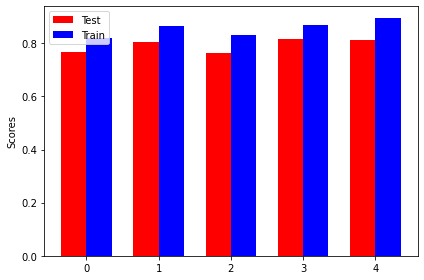

<Figure size 432x288 with 0 Axes>

In [7]:
np.set_printoptions(precision=2)

x_labels = ['Clay', 'Clay & Humus', 'Clay & pH', 'Clay & F1mass', 'Clay & all']

fig, ax = plt.subplots()
width = 0.35  # the width of the bars

x = np.arange(len(x_labels))
rects1 = ax.bar(x - width/2, test_errors, width, color = 'red', label='Test')
rects2 = ax.bar(x + width/2, train_errors, width, color = 'blue', label='Train')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_xticks(range(len(test_errors)), x_labels)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
ax.legend()
fig.tight_layout()

plt.show()
plt.savefig("results_cec", dpi=200)